In [2]:
import nltk
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
#import plotly.plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
py.init_notebook_mode(connected=True)

In [3]:
df = pd.read_excel('Complaint Reports/Mr Clean Complaints.xlsx', sheetname = 'CC Listing')

In [10]:
df.head(5)

,Initial Receipt Date,Case Contact Method,Summary,Case Region,Case Country,Sector,Sub Sector,Category,Brand,Segment,...,City,State Province,Global Comment Path,L1 Comment Code/Comment Type,L2 Comment Code/Comment Category,L3 Comment Code/Comment Description,Comment Criticality,Conclusion Code,Store of Purchase,Complaint Metric
0,2015-12-01,Phone,I bought a bottle of the Mr Clean Magic Eraser...,NaN,UNITED STATES,Fabric & Home Care,Home Care,Surface Care,Mr Clean,Cleaning Products,...,CLEVELAND,OH,Product Quality Complaint/Sensory attributes/F...,Product Quality Complaint,Sensory attributes,"Feel, texture, consistency; too thin, watery",Non-Critical,NaN,Walmart,1
1,2015-12-01,Phone,I recently bought two bottles of the Mr. Clean...,NaN,UNITED STATES,Fabric & Home Care,Home Care,Surface Care,Mr Clean,Cleaning Products,...,BUFFALO,NY,Product Quality Complaint/Sensory attributes/S...,Product Quality Complaint,Sensory attributes,"Smell, scent, aroma, odor",Non-Critical,"Incorrect data input at intake, data corrected",Family Dollar,1
2,2015-12-01,Phone,I called 2 and a half months ago about 6 bottl...,NaN,UNITED STATES,Fabric & Home Care,Home Care,Surface Care,Mr Clean,Cleaning Products,...,ROANOKE,VA,Product Quality Complaint/Sensory attributes/S...,Product Quality Complaint,Sensory attributes,"Smell, scent, aroma, odor",Non-Critical,NaN,Sams Club,1
3,2015-12-01,Phone,I have a bottle of the Mr Clean Multipurpose L...,NaN,CANADA,Fabric & Home Care,Home Care,Surface Care,Mr Clean,Cleaning Products,...,EDMONTON,AB,Product Quality Complaint/Sensory attributes/F...,Product Quality Complaint,Sensory attributes,"Feel, texture, consistency",Non-Critical,NaN,Walmart,1
4,2015-12-01,Phone,I bought the Mr. Clean Multi-Purpose and the M...,NaN,UNITED STATES,Fabric & Home Care,Home Care,Surface Care,Mr Clean,Cleaning Products,...,TURLOCK,CA,Product Quality Complaint/Dissatisfied with pe...,Product Quality Complaint,Dissatisfied with performance,Suds,Non-Critical,NaN,Home Depot,1


In [4]:
df.drop('Product Form Detail',1,inplace=True)
df.drop('Case Region', 1, inplace = True)
df.drop('Sub Brand',1,inplace=True)
df.drop('Collection',1,inplace=True)
df.drop('Version',1,inplace=True)
df.drop('Consumer Benefit 4',1,inplace=True)
df.drop('Product Size',1,inplace=True)
df.drop('Manufacturing Line',1,inplace=True)
df.drop('Sector',1,inplace=True)
df.drop('Sub Sector',1,inplace=True)
df.drop('Brand',1,inplace=True)
df.head(5)

(992, 24)

In [5]:
df.shape

(992, 24)

In [6]:
df.head(5)

,Initial Receipt Date,Case Contact Method,Summary,Case Country,Category,Segment,Flavor Scent Detail,Consumer Benefit 1,Consumer Benefit 2,Consumer Benefit 3,...,City,State Province,Global Comment Path,L1 Comment Code/Comment Type,L2 Comment Code/Comment Category,L3 Comment Code/Comment Description,Comment Criticality,Conclusion Code,Store of Purchase,Complaint Metric
0,2015-12-01,Phone,I bought a bottle of the Mr Clean Magic Eraser...,UNITED STATES,Surface Care,Cleaning Products,Apple Berry Twist,All Purpose,Regular,Regular,...,CLEVELAND,OH,Product Quality Complaint/Sensory attributes/F...,Product Quality Complaint,Sensory attributes,"Feel, texture, consistency; too thin, watery",Non-Critical,NaN,Walmart,1
1,2015-12-01,Phone,I recently bought two bottles of the Mr. Clean...,UNITED STATES,Surface Care,Cleaning Products,Meadows & Rain,All Purpose,Regular,Regular,...,BUFFALO,NY,Product Quality Complaint/Sensory attributes/S...,Product Quality Complaint,Sensory attributes,"Smell, scent, aroma, odor",Non-Critical,"Incorrect data input at intake, data corrected",Family Dollar,1
2,2015-12-01,Phone,I called 2 and a half months ago about 6 bottl...,UNITED STATES,Surface Care,Cleaning Products,Meadows & Rain,All Purpose,Regular,Regular,...,ROANOKE,VA,Product Quality Complaint/Sensory attributes/S...,Product Quality Complaint,Sensory attributes,"Smell, scent, aroma, odor",Non-Critical,NaN,Sams Club,1
3,2015-12-01,Phone,I have a bottle of the Mr Clean Multipurpose L...,CANADA,Surface Care,Cleaning Products,Summer Citrus,All Purpose,Anti-Bacterial,Regular,...,EDMONTON,AB,Product Quality Complaint/Sensory attributes/F...,Product Quality Complaint,Sensory attributes,"Feel, texture, consistency",Non-Critical,NaN,Walmart,1
4,2015-12-01,Phone,I bought the Mr. Clean Multi-Purpose and the M...,UNITED STATES,Surface Care,Cleaning Products,Meadows & Rain,All Purpose,Regular,Regular,...,TURLOCK,CA,Product Quality Complaint/Dissatisfied with pe...,Product Quality Complaint,Dissatisfied with performance,Suds,Non-Critical,NaN,Home Depot,1


Using Seaborn for viewing on github, other plots are made using plotly in jupyter notebook.

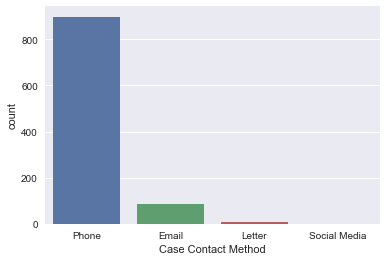

In [7]:
sns.countplot(x='Case Contact Method',data=df)

In [63]:
df['Case Contact Method'].value_counts().iplot(kind='bar', yTitle='Count', title='Contact Method')

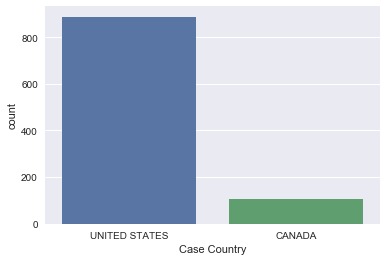

In [8]:
sns.countplot(x='Case Country',data=df)

In [64]:
series = df['Case Country'].value_counts()[:20]
series.head()

UNITED STATES    888
CANADA           104
Name: Case Country, dtype: int64

In [60]:
series.iplot(kind='bar', yTitle='Count', title='Complaints by Country')

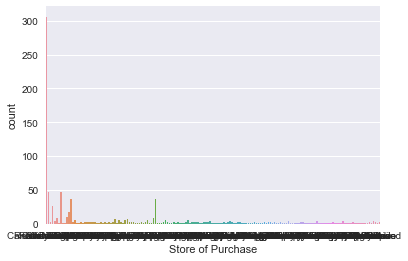

In [9]:
sns.countplot(x='Store of Purchase',data=df)

In [211]:
# df.loc[739, 'Store of Purchase']

In [217]:
df.loc[739, 'Store of Purchase'] = 'Walmart'
df.replace(to_replace='WaslMart', value='Walmart',inplace=True)
df.replace(to_replace='walmart', value='Walmart',inplace=True)
df.replace(to_replace='Wallgreens', value='Walgreens',inplace=True)
df.replace(to_replace='WalMart', value='Walmart',inplace=True)
df.replace(to_replace='Wal-Mart', value='Walmart',inplace=True)
storeseries = df['Store of Purchase'].value_counts()
storeseries[storeseries>=5].iplot(kind='bar', yTitle='Count', title='Complaints by Store')

In [212]:
# df['Store of Purchase'].value_counts()

In [218]:
# df['Store of Purchase'].value_counts().iplot(kind='bar', yTitle='Count', title='Store of Purchase')

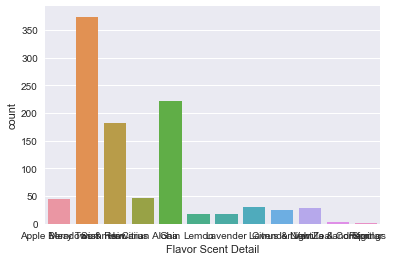

In [10]:
sns.countplot(x='Flavor Scent Detail',data=df)

In [66]:
df['Flavor Scent Detail'].value_counts().iplot(kind='bar', yTitle='Count', title='Complaints by Flavor')

In [73]:
df['Comment Criticality'].value_counts().iplot(kind='bar', yTitle='Count', title='Criticality')

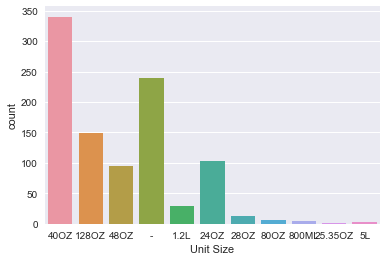

In [11]:
sns.countplot(x='Unit Size',data=df)

In [80]:
df['Unit Size'].value_counts().iplot(kind='bar', yTitle='Count', title='Unit Size')

In [88]:
df['Initial Receipt Date'].value_counts().iplot(kind='bar', yTitle='Count', title='Number of Complaints by Date')

In [165]:
# df.head(5)

In [95]:
df['month'] = df['Initial Receipt Date'].dt.month
df['year'] = df['Initial Receipt Date'].dt.year
df.head(5)

,Initial Receipt Date,Case Contact Method,Summary,Case Country,Category,Segment,Flavor Scent Detail,Consumer Benefit 1,Consumer Benefit 2,Consumer Benefit 3,...,Global Comment Path,L1 Comment Code/Comment Type,L2 Comment Code/Comment Category,L3 Comment Code/Comment Description,Comment Criticality,Conclusion Code,Store of Purchase,Complaint Metric,month,year
0,2015-12-01,Phone,I bought a bottle of the Mr Clean Magic Eraser...,UNITED STATES,Surface Care,Cleaning Products,Apple Berry Twist,All Purpose,Regular,Regular,...,Product Quality Complaint/Sensory attributes/F...,Product Quality Complaint,Sensory attributes,"Feel, texture, consistency; too thin, watery",Non-Critical,NaN,Walmart,1,12,2015
1,2015-12-01,Phone,I recently bought two bottles of the Mr. Clean...,UNITED STATES,Surface Care,Cleaning Products,Meadows & Rain,All Purpose,Regular,Regular,...,Product Quality Complaint/Sensory attributes/S...,Product Quality Complaint,Sensory attributes,"Smell, scent, aroma, odor",Non-Critical,"Incorrect data input at intake, data corrected",Family Dollar,1,12,2015
2,2015-12-01,Phone,I called 2 and a half months ago about 6 bottl...,UNITED STATES,Surface Care,Cleaning Products,Meadows & Rain,All Purpose,Regular,Regular,...,Product Quality Complaint/Sensory attributes/S...,Product Quality Complaint,Sensory attributes,"Smell, scent, aroma, odor",Non-Critical,NaN,Sams Club,1,12,2015
3,2015-12-01,Phone,I have a bottle of the Mr Clean Multipurpose L...,CANADA,Surface Care,Cleaning Products,Summer Citrus,All Purpose,Anti-Bacterial,Regular,...,Product Quality Complaint/Sensory attributes/F...,Product Quality Complaint,Sensory attributes,"Feel, texture, consistency",Non-Critical,NaN,Walmart,1,12,2015
4,2015-12-01,Phone,I bought the Mr. Clean Multi-Purpose and the M...,UNITED STATES,Surface Care,Cleaning Products,Meadows & Rain,All Purpose,Regular,Regular,...,Product Quality Complaint/Dissatisfied with pe...,Product Quality Complaint,Dissatisfied with performance,Suds,Non-Critical,NaN,Home Depot,1,12,2015


In [159]:
# df.groupby(['year', 'month']).count()

In [157]:
# test = df.groupby(['year'])['month'].value_counts()
# test.head()

In [156]:
# test.plot.bar()

In [158]:
new = pd.DataFrame({'count' : df.groupby([ "year", "month"]).size()}).reset_index()
new.head()

,year,month,count
0,2015,12,63
1,2016,1,72
2,2016,2,52
3,2016,3,74
4,2016,4,51


Plotting the complaints by month

In [154]:
# x = new['month']
# y = new['count']

# data = [go.Bar(
#     x=x,
#     y=y,
#     marker=dict(
#         color='rgb(158,202,225)',
#         line=dict(
#             color='rgb(8,48,107)',
#             width=1.5),
#     ),
#     opacity=0.6
# )]

# fig = go.Figure(data=data)
# py.iplot(fig,filename='monthcounts')

In [164]:
trace0 = go.Bar(
    x=['Dec 2015','Jan 2016', 'Feb 2016', 'Mar 2016', 'Apr 2016', 'May 2016', 'Jun 2016',
       'Jul 2016', 'Aug 2016', 'Sep 2016', 'Oct 2016', 'Nov 2016', 'Dec 2016','Jan 2017', 
       'Feb 2017', 'Mar 2017', 'Apr 2017', 'May 2017', 'Jun 2017'],
    y=new['count'],
    name='Months',
    marker=dict(
        color='#99badd'
    )
)

data = [trace0]
layout = go.Layout(
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')

In [221]:
# new['count'].iplot(kind='bar', yTitle='Count', title='Complaints by Month')

In [219]:
#Templates
# df['Unit Size'].unique()
# df.drop('Product Form Detail',1,inplace=True)

In [ ]:
#Haven't used these
#df.apply( lambda x: len(x[-x.isnull()].unique()) == 1 , axis = 1).all()
#df.groupby('Case Contact Method').count()